In [72]:
import pandas as pd
import numpy as np
from markdown import markdown
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import glob, os
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

In [123]:

lst=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_0_to_9/")
for file in glob.glob("*.md"):
    lst.append(file)

In [124]:
lst

['10_myths_about_psychology_debunked_Ben_Ambridge.md',
 "10_things_you_didn't_know_about_orgasm_Mary_Roach.md",
 '10_top_time_saving_tech_tips_David_Pogue.md',
 '10_ways_to_have_a_better_conversation_Celeste_Headlee.md',
 '12_sustainable_design_ideas_from_nature_Janine_Benyus.md',
 '12_truths_I_learned_from_life_and_writing_Anne_Lamott.md',
 '3_clues_to_understanding_your_brain_VS_Ramachandran.md',
 "3_fears_about_screen_time_for_kids_and_why_they're_not_true_Sara_DeWitt.md",
 '3_lessons_on_success_from_an_Arab_businesswoman_Leila_Hoteit.md',
 '3_moons_and_a_planet_that_could_have_alien_life_James_Green.md',
 '3_principles_for_creating_safer_AI_Stuart_Russell.md',
 '3_reasons_why_we_can_win_the_fight_against_poverty_Andrew_Youn.md',
 '3_rules_to_spark_learning_Ramsey_Musallam.md',
 '3_things_I_learned_while_my_plane_crashed_Ric_Elias.md',
 '3_ways_the_brain_creates_meaning_Tom_Wujec.md',
 '3_ways_to_fix_a_broken_news_industry_Lara_Setrakian.md',
 '3_ways_to_plan_for_the_very_long_term_

In [125]:
master=[]
for fname in lst:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master.append(text)

C:\Users\Yash\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Yash\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [126]:
print(len(lst))
print(len(master))

32
32


In [49]:
df = pd.DataFrame(data=master)

In [51]:
df['title'] = lst

In [53]:
df.head()

,0,title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [54]:
df.columns=['Content','Title']

In [55]:
df.head()

,Content,Title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tfidf = TfidfVectorizer(stop_words='english')

In [58]:
X = tfidf.fit_transform(df.iloc[:,0])

In [60]:
X

<32x6804 sparse matrix of type '<class 'numpy.float64'>'
	with 15227 stored elements in Compressed Sparse Row format>

In [61]:
tfidf.get_feature_names()

['000',
 '08',
 '10',
 '100',
 '10s',
 '10th',
 '11',
 '11th',
 '12',
 '13',
 '14',
 '140',
 '15',
 '15th',
 '16',
 '1656',
 '17',
 '175',
 '18',
 '180',
 '1859',
 '1900s',
 '1930s',
 '1940s',
 '1950s',
 '1951',
 '1954',
 '1960',
 '1960s',
 '1975',
 '1977',
 '1980s',
 '1983',
 '1984',
 '1985',
 '1987',
 '1990s',
 '1996',
 '1999',
 '19th',
 '1d',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2012',
 '2014',
 '2015',
 '2016',
 '2050',
 '206',
 '20s',
 '20th',
 '21',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '25',
 '250',
 '26',
 '275',
 '28',
 '30',
 '300',
 '30pm',
 '32',
 '33',
 '35',
 '35w',
 '36',
 '37',
 '40',
 '400',
 '41',
 '42',
 '420',
 '45',
 '47',
 '48',
 '50',
 '500',
 '58',
 '60',
 '600',
 '60s',
 '61st',
 '65',
 '650',
 '66',
 '6x',
 '70',
 '70s',
 '72',
 '75',
 '7pm',
 '80',
 '80s',
 '90',
 '96',
 '98',
 'abandoned',
 'abc',
 'abdicated',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abode',
 'a

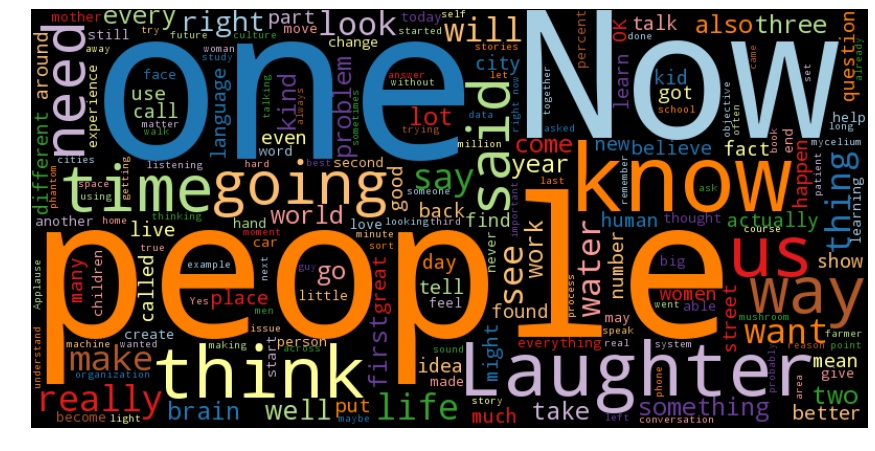

In [86]:

wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(master))

#wordcloud.to_file("cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [107]:
lst1=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_A_to_O/")
for file in glob.glob("*.md"):
    lst1.append(file)
    
master1=[]
for fname in lst1:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master1.append(text)

lst2=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_ted_data/Titles_starting_P_to_Z/")
for file in glob.glob("*.md"):
    lst2.append(file)
    
master2=[]
for fname in lst2:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master2.append(text)

C:\Users\Yash\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Yash\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [108]:
print(len(lst1))
print(len(master1))
print(len(lst2))
print(len(master2))

1583
1583
883
883


In [109]:
master_lst = lst1 + lst2

In [110]:
len(master_lst)

2466

In [111]:
final_master = master1 + master2

In [112]:
len(final_master)

2466

In [113]:
df1 = pd.DataFrame(data=final_master)

In [115]:
df1['Title'] = master_lst

In [116]:
df1.columns=['Content','Title']

In [117]:
df1.head()

,Content,Title
0,(Music) (Applause),Aakash_Odedra_A_dance_in_a_hurricane_of_paper_...
1,I'm here today to show my photographs of the L...,Aaron_Huey_America's_native_prisoners_of_war.md
2,So I think data can actually make us more huma...,Aaron_Koblin_Artfully_visualizing_our_humanity.md
3,"This is a representation of your brain, and yo...",Aaron_O'Connell_Making_sense_of_a_visible_quan...
4,Most of us think of motion as a very visual th...,Abe_Davis_New_video_technology_that_reveals_an...


In [119]:
df1.tail()

,Content,Title
2461,I have 18 minutes to tell you what happened ov...,Zeresenay_Alemseged_Finding_the_origins_of_hum...
2462,"So recently, we heard a lot about how social m...",Zeynep_Tufekci_How_the_Internet_has_made_socia...
2463,Every presentation needs this slide in it. (La...,Ze_Frank's_web_playroom.md
2464,"(Music) This is the human test, a test to see ...",Ze_Frank_Are_you_human.md
2465,"These are simple objects: clocks, keys, combs,...",Ziyah_Gafić_Everyday_objects_tragic_histories.md


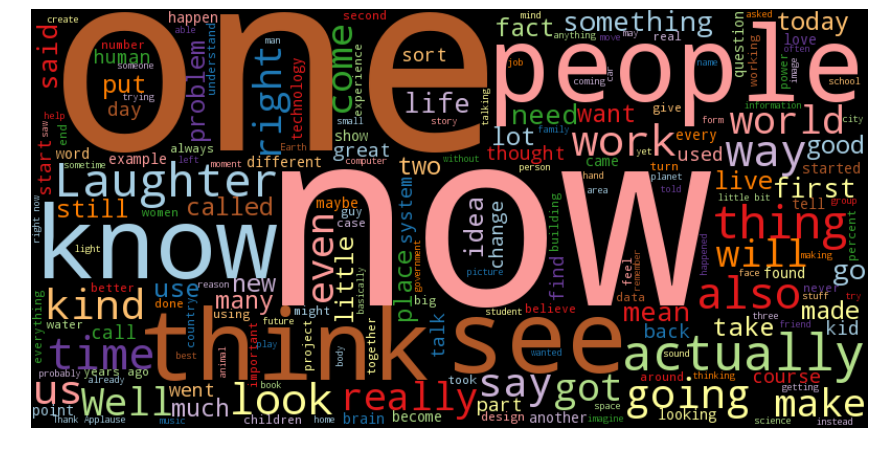

In [120]:
wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(final_master))

#wordcloud.to_file("cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [147]:
X

<32x6804 sparse matrix of type '<class 'numpy.float64'>'
	with 15227 stored elements in Compressed Sparse Row format>

In [177]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [171]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [190]:
for i in range(len(lst)):
    print(top_feats_in_doc(X,tfidf.get_feature_names(), i),'\n')
    print(lst[i],'\n')

          feature     tfidf
0            myth  0.338126
1          mozart  0.284310
2             men  0.241568
3    participants  0.159924
4           women  0.153646
5          people  0.147631
6      psychology  0.124385
7           genes  0.124385
8           study  0.120241
9           brain  0.120241
10      preferred  0.119338
11        percent  0.116563
12          music  0.113156
13      listening  0.106707
14         handed  0.106616
15       creative  0.105686
16        learner  0.099449
17          style  0.088847
18       patterns  0.088847
19        stories  0.088481
20        average  0.088481
21        partner  0.081325
22  psychological  0.081325
23          twins  0.079559
24           gcse  0.079559 

10_myths_about_psychology_debunked_Ben_Ambridge.md 

       feature     tfidf
0       orgasm  0.380482
1     laughter  0.308253
2        semen  0.268576
3         said  0.168190
4      trigger  0.156669
5         okay  0.152904
6         dead  0.135084
7      johnson  0

"10_things_you_didn't_know_about_orgasm_Mary_Roach.md"